Naszym zadaniem na tych zajęciach było zmaksymalizowanie wartości prądu w dwójniku rezystorowym ukazanym na rysunku:
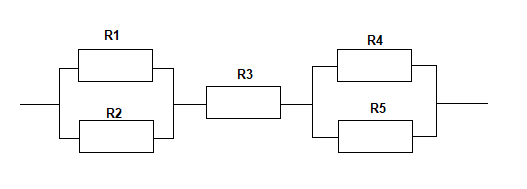

Dane, które mamy podane:
* R1 = 8 
* R2 = 6 
* R3 = 4 
* R4 = 10 
* R5 = 8
* I1_max = 2 
* I2_max = 3 
* I3_max = 4 
* I4_max = 2 
* I5_max = 2

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

In [ ]:
import numpy as np
from pulp import *

prob = LpProblem("Maksymalizacja prądu",LpMaximize)

i1=LpVariable("I_1", 0, 2, LpContinuous)
i2=LpVariable("I_2", 0, 3, LpContinuous)
i3=LpVariable("I_3", 0, 4, LpContinuous)
i4=LpVariable("I_4", 0, 2, LpContinuous)
i5=LpVariable("I_5", 0, 2, LpContinuous)
 
R = (8.0, 6.0, 4.0, 10.0, 8.0)

prob += i1+i2+i3+i4+i5, "Imax"

prob += i1+i2 == i3, "1" 
prob += i3-i4 == i5, "2"
prob += i1*R[0] - i2*R[1] == 0, "3"
prob += i4*R[3] - i5*R[4] == 0, "4"

prob.writeLP("dwojnik.lp")

prob.solve()
print("Status:", LpStatus[prob.status])

Imax = 0
for v in prob.variables():
    print(v.name, "=", v.varValue, "A")
    if (v.varValue >= Imax):
      Imax = v.varValue 
    
print()
print("Suma prądu =", value(prob.objective), "A\n") 
print("I_max = ", Imax, "A\n")

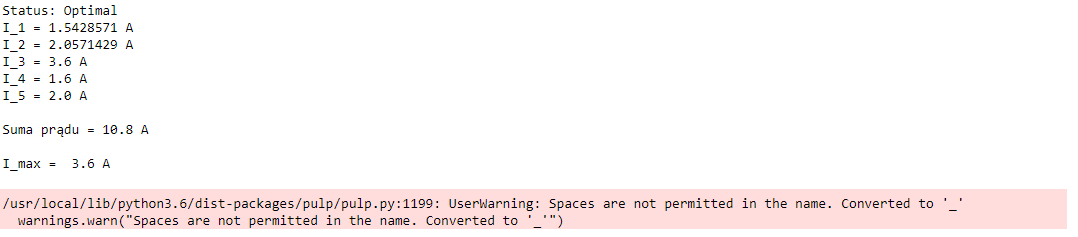